In [115]:
import pandas as pd
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Dados

In [2]:
# Fonte: covid.saude.gov.br
df_brasil = pd.read_csv('dados_brasil.csv', sep = ';', encoding = 'latin1')


In [3]:
df_brasil.head(5)

,regiao,estado,data,casosNovos,casosAcumulados,obitosNovos,obitosAcumulados
0,Norte,RO,2020-01-30,0,0,0,0
1,Norte,RO,2020-01-31,0,0,0,0
2,Norte,RO,2020-02-01,0,0,0,0
3,Norte,RO,2020-02-02,0,0,0,0
4,Norte,RO,2020-02-03,0,0,0,0


In [ ]:
dict_obitos_acumulados = {}
dict_obitos_acumulados['datas_brasil'] = list(set(df_brasil['data']))
for i in list(set(df_brasil['estado'])):
    dict_obitos_acumulados[i] = list(df_brasil[df_brasil['estado'] == i]['obitosAcumulados'])
    print(i)
dict_obitos_acumulados['datas_brasil'].sort()

In [5]:
# Fonte: https://www.worldometers.info/coronavirus/
dict_obitos_paises = {
'usa' : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,6,9,11,12,15,19,22,26,30,38,41,48,58,73,95,121,171,239,309,374,509,689,957,1260,1614,2110,2754,3251,4066,5151,6394,7576,8839,10384,11793,13298,15526,17691,19802,22038,24062,25789,27515,30081,32712,34905,37448,39331,40901,42853,45536,47894,50234,52191,54256,55412,56795,59265,61655],
'ita' : [0,0,0,0,0,0,1,2,3,7,11,12,17,21,29,41,52,79,107,148,197,233,366,463,631,827,1016,1266,1441,1809,2158,2503,2978,3405,4032,4825,5476,6077,6820,7503,8215,9134,10023,10779,11591,12428,13155,13915,14681,15362,15887,16523,17127,17669,18279,18849,19468,19899,20465,21067,21645,22170,22745,23227,23660,24114,24648,25085,25549,25969,26384,26644,26977,27359,27682],
'esp' : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,8,10,17,30,36,55,86,133,196,294,342,533,638,831,1093,1381,1772,2311,2991,3647,4365,5138,5982,6803,7716,8464,9387,10348,11198,11947,12641,13341,14045,14792,15447,16081,16606,17209,17756,18255,18812,19130,19478,20043,20453,20852,21282,21717,22157,22524,22902,23190,23521,23822,24275],
'coreia' : [0,0,0,0,0,1,2,2,6,8,11,12,13,16,17,21,28,32,35,42,43,48,50,53,60,60,66,67,72,75,75,81,84,91,94,102,104,111,120,126,131,139,144,152,158,162,165,169,174,177,183,186,192,200,204,208,211,214,217,222,225,229,230,232,234,236,237,238,240,240,240,242,243,244,246],
'mexico' : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,3,4,5,6,8,12,16,20,28,29,37,50,60,79,94,125,141,174,194,233,273,296,332,406,449,486,546,650,686,712,857,970,1069,1221,1305,1351,1434,1569],
'uk' : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,3,7,7,9,10,28,43,65,81,115,158,194,250,285,359,508,694,877,1161,1455,1669,2043,2425,3095,3747,4461,5221,5865,6433,7471,8505,9608,10760,11599,12285,13029,14073,14915,15944,16879,17994,18492,19051,20223,21060,21787,22792,23635,24055,24393,25302,26097],
'franca' : [1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,3,4,4,7,9,16,19,30,33,48,61,79,91,127,148,175,264,372,450,562,674,860,1100,1331,1696,1995,2314,2606,3024,3523,4032,5387,6507,7560,8078,8911,10328,10869,12210,13197,13832,14393,14967,15729,17167,17920,18681,19323,19718,20265,20796,21340,21856,22245,22614,22856,23293,23660,24087],
'russia' : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,3,4,4,8,9,17,24,30,34,43,45,47,58,63,76,94,106,130,148,170,198,232,273,313,361,405,456,513,555,615,681,747,794,867,972],
'iran' : [0,0,0,0,2,2,4,6,8,12,16,19,26,34,43,54,66,77,92,108,124,145,194,237,291,354,429,514,611,724,853,988,1135,1284,1433,1556,1685,1812,1934,2077,2234,2378,2517,2640,2757,2898,3036,3160,3294,3452,3603,3739,3872,3993,4110,4232,4357,4474,4585,4683,4777,4869,4958,5031,5118,5209,5297,5391,5481,5574,5650,5710,5806,5877,5957],
'canada' : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,4,8,9,12,12,19,20,24,26,36,39,55,60,65,89,101,114,173,208,231,280,323,381,427,509,569,653,717,780,903,1010,1195,1310,1470,1587,1690,1834,1974,2147,2302,2465,2560,2707,2859,2996],
'belgica' : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,4,4,10,10,14,21,37,67,75,88,122,178,220,289,353,431,513,705,828,1011,1143,1283,1447,1632,2035,2240,2523,3019,3346,3600,3903,4157,4440,4857,5163,5453,5683,5828,5998,6262,6490,6679,6917,7094,7207,7331,7501],
'alemanha' : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,3,6,8,9,13,17,26,28,44,68,84,94,123,159,206,267,351,433,541,645,775,931,1107,1275,1444,1584,1810,2016,2349,2607,2736,2871,3022,3194,3495,3804,4052,4352,4538,4642,4862,5086,5315,5575,5760,5877,5976,6126,6314,6467],
'turquia' : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,4,9,21,30,37,44,59,75,92,108,131,168,214,277,356,425,501,574,649,725,812,908,1006,1101,1198,1296,1403,1518,1643,1769,1890,2017,2140,2259,2376,2491,2600,2706,2805,2900,2992,3081],
'holanda' : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,4,4,5,5,10,12,20,24,43,58,76,106,136,179,213,276,356,434,546,639,771,864,1039,1173,1339,1487,1651,1766,1867,2101,2248,2396,2511,2643,2737,2823,2945,3134,3315,3459,3601,3684,3751,3916,4054,4177,4289,4409,4475,4518,4566,4711],
'peru' : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,5,5,5,7,9,9,11,16,18,24,30,38,55,61,73,83,92,107,121,138,169,181,193,216,230,254,274,300,348,400,445,484,530,572,634,700,728,782,854,943],
'india' : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,3,3,4,5,5,7,10,10,12,20,20,24,27,32,35,58,72,86,99,118,136,160,178,227,249,288,331,358,393,422,448,486,521,559,592,645,681,721,780,825,881,939,1008,1079],
'suica' : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,3,4,7,11,13,14,19,27,33,43,56,80,98,120,122,153,192,231,264,300,359,433,488,536,591,666,715,765,821,895,948,1002,1036,1106,1138,1174,1239,1281,1327,1368,1393,1429,1478,1509,1549,1589,1599,1610,1665,1699,1716],
'portugal' : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,4,6,12,14,23,33,43,60,76,100,119,140,160,187,209,246,266,295,311,345,380,409,435,470,504,535,567,599,629,657,687,714,735,762,785,820,854,880,903,928,948,973],
'equador' : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,3,3,7,7,14,18,27,29,34,41,48,58,62,79,98,120,145,172,180,191,220,242,272,297,315,333,355,369,388,403,421,456,474,507,520,537,560,576,576,576,663,871,883],
'irlanda' : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,2,2,2,3,3,3,4,6,7,9,19,22,36,46,54,71,85,98,120,137,158,174,210,235,263,287,320,334,365,406,444,486,530,571,610,687,730,769,794,1014,1063,1087,1102,1159,1190],
'suecia' : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,3,7,8,10,11,16,20,21,27,40,62,77,105,105,110,146,180,239,308,358,373,401,477,591,687,793,870,887,899,919,1033,1203,1333,1400,1511,1540,1580,1765,1937,2021,2152,2192,2194,2274,2355,2462],
'arabia_saudita' : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,3,4,8,8,10,16,21,25,29,34,38,41,41,44,47,52,59,65,73,79,83,87,92,97,103,109,114,121,127,136,139,144,152,157]
}

### 2. Comparação Estado x Países

In [256]:
estado = 'PR'
df_estado = pd.DataFrame(columns=['País', 'Diferença Média Ponto a Ponto', 'Diferença - Últimos 10 Dias', 'dif_last_5', 'dif_media', 'Diferença Média de Aceleração (-5d)', 'Diferença Média de Velocidade (-5d)'])
vetor_estado = [k for k in dict_obitos_acumulados[estado] if k > 10]
vetor_estado_dif_1 = []
for i in list(range(-6,0)):
    vetor_estado_dif_1.append(vetor_estado[i] - vetor_estado[i-1])

vetor_estado_dif_2 = []
for i in list(range(-5,0)):
    vetor_estado_dif_2.append(vetor_estado_dif_1[i] - vetor_estado_dif_1[i-1])
    
media_vel_estado_l_5 = np.mean(vetor_estado_dif_1[1:])
media_acelera_estado_l_5 = np.mean(vetor_estado_dif_2)

len_ref = len(vetor_estado)

for j in list(dict_obitos_paises.keys()):
    if len([k for k in dict_obitos_paises[j] if k > 10]) >= len_ref:
        vetor_pais = [k for k in dict_obitos_paises[j] if k > 10][:len_ref]
        vetor_diferenca = []
        for l in range(len(vetor_pais)):
            vetor_diferenca.append(abs((vetor_pais[l]/vetor_estado[l])-1))
        vetor_pais_dif_1 = []
        for m in list(range(-6,0)):
            vetor_pais_dif_1.append(vetor_pais[m] - vetor_pais[m-1])

        vetor_pais_dif_2 = []
        for n in list(range(-5,0)):
            vetor_pais_dif_2.append(vetor_pais_dif_1[n] - vetor_pais_dif_1[n-1])
    
        media_acelera_pais_l_5 = np.mean(vetor_pais_dif_2)
        media_vel_pais_l_5 = np.mean(vetor_pais_dif_1[1:])
        dif_media_acelera = abs((media_acelera_pais_l_5/media_acelera_estado_l_5)-1)
        dif_media_vel = abs((media_vel_pais_l_5/media_vel_estado_l_5)-1)

        df_temp = pd.DataFrame([[j, np.mean(vetor_diferenca), np.mean(vetor_diferenca[-10:]), np.mean(vetor_diferenca[-5:]), (np.mean(vetor_diferenca) + np.mean(vetor_diferenca[-10:]) + np.mean(vetor_diferenca[-5:]))/3, dif_media_acelera, dif_media_vel]], columns = ['País', 'Diferença Média Ponto a Ponto', 'Diferença - Últimos 10 Dias', 'dif_last_5', 'dif_media', 'Diferença Média de Aceleração (-5d)', 'Diferença Média de Velocidade (-5d)'])
        
        df_estado = pd.concat([df_estado,df_temp])

df_estado['Índice de Divergência da Curva'] = (df_estado['Diferença Média Ponto a Ponto'] + df_estado['Diferença - Últimos 10 Dias'] + df_estado['Diferença Média de Aceleração (-5d)'] + df_estado['Diferença Média de Velocidade (-5d)'])/4
df_estado['Rank'] = df_estado['Índice de Divergência da Curva'].rank()
df_estado = df_estado[df_estado['Rank'] <= 3]
df_estado.sort_values('Rank', inplace = True)
print('Comparação: ' + estado + ' X países. Ranking dos 3 países mais similares.')
df_estado[['País', 'Diferença Média Ponto a Ponto', 'Diferença - Últimos 10 Dias', 'Diferença Média de Velocidade (-5d)', 'Diferença Média de Aceleração (-5d)']]


Comparação: PR X países. Ranking dos 3 países mais similares.


,País,Diferença Média Ponto a Ponto,Diferença - Últimos 10 Dias,Diferença Média de Velocidade (-5d),Diferença Média de Aceleração (-5d)
0,coreia,0.124869,0.116179,0.055556,1.0
0,arabia_saudita,0.442446,0.539860,0.666667,0.0
0,india,2.171545,4.029989,7.611111,6.0


### 3. Gráfico

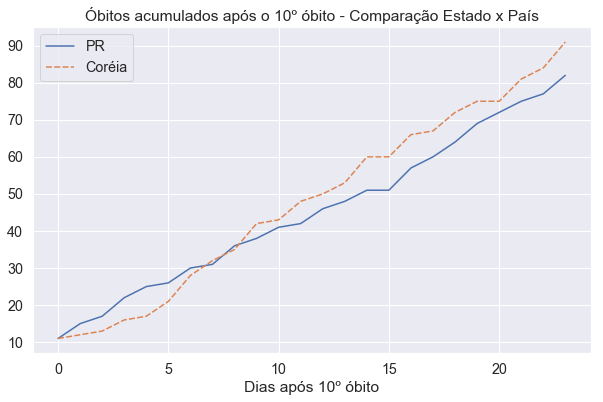

In [257]:
p = 'coreia'
label_p = 'Coréia'

dias = list(range(len_ref))
y1 = vetor_estado
y2 = [k for k in dict_obitos_paises[p] if k > 10][:len_ref]

df_grafico = pd.DataFrame.from_dict({'Dias após 10º óbito': dias, estado: y1, label_p: y2}).set_index('Dias após 10º óbito')

# Gráfico
sns.set(font_scale=1.3)
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title('Óbitos acumulados após o 10º óbito - Comparação Estado x País')
sns.lineplot(data=df_grafico, ax = ax)